<a href="https://colab.research.google.com/github/gabmac/ISL/blob/main/Chapter3_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Chapter 3*

Exercise from Chapter 3 of ***An introduction to Statistical Learning***  by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani.


>Questions 5,6,7 see in https://nbviewer.jupyter.org/github/a-martyn/ISL-python/blob/master/Notebooks/ch3_linear_regression_conceptual.ipynb

>Question 8 plots: https://data.library.virginia.edu/diagnostic-plots/

# Exercises

## Conceptual

### Question 1

Describe the null hypotheses to which the p-values given in Table 3.4
correspond. Explain what conclusions you can draw based on these
p-values. Your explanation should be phrased in terms of sales, TV,
radio, and newspaper, rather than in terms of the coefficients of the
linear model.


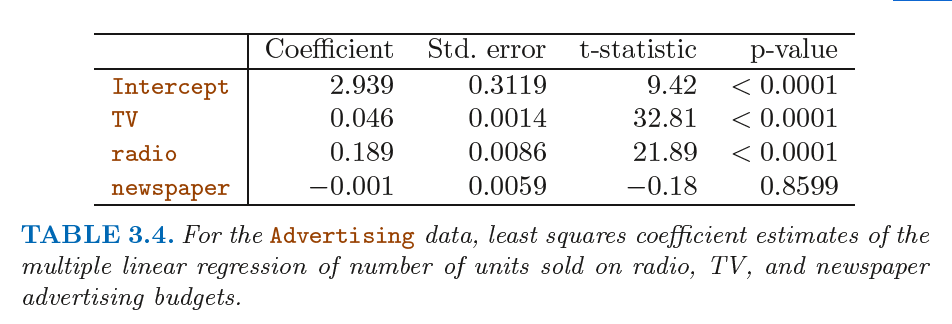

>The Null hypothesis is: There is no relationship between the amount spend in advertising, no matter if it is TV, radio or newspaper, and sales.

> The p-values suggests that there is some relationship between TV and Radio with sales, and there is no significant relationship between newspaper and sales. 

### Question 2

Carefully explain the differences between the KNN classifier and KNN regression methods.

> The KNN classifier and the KNN regression methods are largely similar. The KNN classifier determines a decision boundary which can be used to segment data into 2 or more clusters or groups. KNN regression is non-parmetric method for estimating a regression function that can be used to predict some quantitivie variable.

### Question 3

Suppose we have a data set with five predictors, X1 = GPA, X2 = IQ, X3 = Gender (1 for Female and 0 for Male), X4 = Interaction between GPA and IQ, and X5 = Interaction between GPA and Gender. The response is starting salary after graduation (in thousands of dollars). Suppose we use least squares to fit the model, and get β_0 = 50, β_1 = 20 , β_2 = 0.07 , β_3 = 35 , β_4 = 0.01 , β_5 = −10 

(a) Which answer is correct, and why?

1. For a fixed value of IQ and GPA, males earn more on average
than females.

2. For a fixed value of IQ and GPA, females earn more on
average than males.

3. For a fixed value of IQ and GPA, males earn more on average
than females provided that the GPA is high enough.

4. For a fixed value of IQ and GPA, females earn more on
average than males provided that the GPA is high enough.

> 3


(b) Predict the salary of a female with IQ of 110 and a GPA of 4.0


In [4]:
def salary(b_0,b_1,b_2,b_3,b_4,b_5,gpa,iq,gender):
  return b_0 + b_1*gpa + b_2*iq + b_3*gender + b_4*gpa*iq + b_5*gpa*gender

b_0 = 50
b_1 = 20
b_2 = 0.07
b_3 = 35
b_4 = 0.01
b_5 = -10
gpa = 4
iq = 110
gender = 1

print(salary(b_0,b_1,b_2,b_3,b_4,b_5,gpa,iq,gender)*1000)

137100.0


(c) True or false: Since the coefficient for the GPA/IQ interaction term is very small, there is very little evidence of an interaction effect. Justify your answer.

> False: if the standard error is small than the effect need to be considered.

###Question 4

I collect a set of data (n = 100 observations) containing a single predictor and a quantitative response. I then fit a linear regression model to the data, as well as a separate cubic regression, i.e.
Y = β0 + β1X + β2X^2 + β3X^3 + ε

(a) Suppose that the true relationship between X and Y is linear, i.e. Y = β0 + β1X + ε. Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

>The lower RSS would be the cubic model, because it is more complex so it probably fit more closely to trainning data, causing overfitting, even though the model is truly linear

(b) Answer (a) using test rather than training RSS.

> The lower RSS would be linear model, because the data is truly linear, and cubic model probably would overfit the training data

(c) Suppose that the true relationship between X and Y is not linear, but we don’t know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.


>The lower RSS would be the cubic model, because it is more complex so it probably fit more closely to trainning data

(d) Answer (c) using test rather than training RSS.

>There is no enough information

##Applied

##Question 8

This question involves the use of simple linear regression on the Auto data set.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [16]:
path = r'/content/drive/MyDrive/Colab Notebooks/Introduction To Statistical Learning With Applications In R'

dfAuto = pd.read_csv(path+'/Auto.csv')
print(dfAuto.shape)
dfAuto.head()

(392, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [17]:
dfAuto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [8]:
dfAuto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


(a) Use the lm() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the summary() function to print the results. Comment on the output. For example:
i. Is there a relationship between the predictor and the response?
ii. How strong is the relationship between the predictor and the response?
iii. Is the relationship between the predictor and the response positive or negative?
iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?

In [31]:
reg1 = linear_model.LinearRegression()
y = dfAuto[['mpg']]
x = dfAuto[['horsepower']]

reg1.fit(x,y)

print(reg1.coef_,reg1.intercept_)

X = sm.add_constant(x) 
results = sm.OLS(y, X).fit()
print(results.summary())

y_pred = reg1.predict(x)

[[-0.15784473]] [39.93586102]
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 23 Jun 2021   Prob (F-statistic):           7.03e-81
Time:                        02:32:18   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359 

1. Is there a relationship between the predictor and the response?

> yes, the low P-value indicates that the slope is different from 0


2.  How strong is the relationship between the predictor and the response?

In [30]:
r2_reg1 = r2_score(y,y_pred)

mse_reg1 = mean_squared_error(y,y_pred)  

print(f'R2 Score: {r2_reg1}', f'MSE: {mse_reg1}')

R2 Score: 0.6059482578894348 MSE: 23.943662938603108


> For a unit increase in horsepower, the model predicts the mpg will decrease by 0.158. The R2 = 0.6 indicates that 60% of invariability is explained, but the high MSE indicate lack of accuracy of the model


3. Is the relationship between the predictor and the response positive or negative?

> The relationship is negative


4. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals ?

In [41]:
reg1.predict(pd.Series([98]).to_frame())

array([[24.46707715]])

In [43]:
print(38.525-0.171*98)
print(41.347-0.145*98)

21.766999999999996
27.137


(b) Plot the response and the predictor. Use the abline() function
to display the least squares regression line.

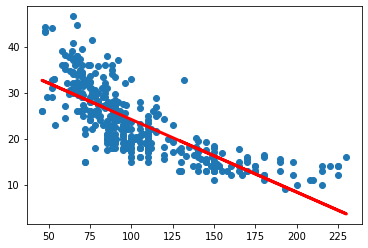

In [46]:
plt.scatter(x,y)
plt.plot(x, y_pred, color ='red', linewidth = 3)
plt.xticks()
plt.yticks()
plt.show()

(c) Use the plot() function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.

1. Residuals vs Fitted

This plot shows if residuals have non-linear patterns. There could be a non-linear relationship between predictor variables and an outcome variable and the pattern could show up in this plot if the model doesn’t capture the non-linear relationship. If you find equally spread residuals around a horizontal line without distinct patterns, that is a good indication you don’t have non-linear relationships.